# Explore here

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep=',')
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [3]:
df.shape

(3140, 108)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
# Asumiendo que tienes un DataFrame llamado df
# Cambia 'df' por el nombre de tu DataFrame

#La siguiente línea selecciona solo las columnas que son numéricas (es decir, int o float)
# del DataFrame 'datos_limpios'. Esta selección se hace usando el método 'select_dtypes',
# y especificamos que solo queremos las columnas de tipo numérico con 'include=[np.number]'.
columnas_numericas = df.select_dtypes(include=[np.number])

# Identificar columnas que son de tipo 'object'
object_columns = df.select_dtypes(include=['object','category']).columns

# Mostrar las columnas de tipo 'object'
object_columns

# Crear variables dummy para las columnas de tipo 'object'
# drop_first=True es opcional y se usa para evitar la trampa de la multicolinealidad en modelos lineales.
df_dummies = pd.get_dummies(df[object_columns], drop_first=True)

# Una vez que hemos procesado las columnas categóricas y numéricas por separado,
# queremos combinarlas nuevamente en un solo DataFrame.
# 'pd.concat' es una función que une (concatena) varios DataFrames.
# Le pasamos una lista de los DataFrames que queremos unir (en este caso, 'columnas_numericas' y 'df_dummies').
# 'axis=1' especifica que queremos unir los DataFrames lado a lado, es decir, añadir columnas.

datos_limpios_nueva = pd.concat([columnas_numericas, df_dummies.astype(int)], axis=1)

# Finalmente, imprimimos el nuevo DataFrame para ver cómo quedó.
datos_limpios_nueva

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,STATE_NAME_South Dakota,STATE_NAME_Tennessee,STATE_NAME_Texas,STATE_NAME_Utah,STATE_NAME_Vermont,STATE_NAME_Virginia,STATE_NAME_Washington,STATE_NAME_West Virginia,STATE_NAME_Wisconsin,STATE_NAME_Wyoming
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,0,0,0,0,0,0,0,0,0,0
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,0,0,0,0,0,0,0,0,0,0
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,0,0,0,0,0,0,0,0,0,0
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,0,0,0,0,0,0,0,0,0,0
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,0,0,0,0,0,0,0,0,0,1
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,0,0,0,0,0,0,0,0,0,1
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,0,0,0,0,0,0,0,0,0,1
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,0,0,0,0,0,0,0,0,0,1


In [6]:
datos_limpios_nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 1996 entries, fips to STATE_NAME_Wyoming
dtypes: float64(61), int64(1935)
memory usage: 47.8 MB


In [7]:
pd.set_option('display.max_columns', None)
datos_limpios_nueva



fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    11.896628   3268                 13.134520   3201   
3                    11.589286   3029                 13.522321   3113   
4                    13.087828   6742                 11.656293   6884   
...                        ...    ...                       ...    ...   
3135                 14.694200   5359                 12.448027   6577   
3136                  9.466661   2967                 12.854729   4093   
3137                 15.788955   2153                 10.606434   2702   
3138                 14.115409    715                  9.067850    903   
3139                 11.181283    681                  9.774652    906   

      30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
0                    12.749771   7582                 13.636445   7738   
1                    11.564429  27338                 12.539102  29986   
2                    12.865239   3074                 12.354809   3278   
3                    13.897321   3038                 13.562500   3115   
4                    11.901798   7474                 12.921853   7844   
...                        ...    ...                       ...    ...   
3135                 15.277229   5334                 12.389956   5261   
3136                 17.733200   3423                 14.830380   2928   
3137                 13.311001   2390                 11.773979   2434   
3138                 11.452124    900                 11.414077   1085   
3139                 13.004162    734                 10.535381    986   

      50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  \
0                    13.917016   5826                 10.478229   4050   
1                    13.753658  29932                 13.728890  20936   
2                    13.174712   3076                 12.362847   2244   
3                    13.906250   2545                 11.361607   1723   
4                    13.561549   6965                 12.041840   4931   
...                        ...    ...                       ...    ...   
3135                 12.220390   4943                 11.481731   2198   
3136                 12.685759   2875                 12.456133   1569   
3137                 11.990738   2554                 12.581901   1233   
3138                 13.760304   1118                 14.178821    741   
3139                 14.152433   1145                 16.434620    560   

      70-79 y/o % of total pop   80+  80+ y/o % of total pop  White-alone pop  \
0                     7.284042  2014                3.622237            42660   
1                     9.602701  9368                4.296814           190301   
2                     9.018930  1048                4.212049            12209   
3                     7.691964   785                3.504464            17211   
4                     8.525242  2335                4.036999            55456   
...                        ...   ...                     ...              ...   
3135            

In [8]:
print(datos_limpios_nueva['diabetes_prevalence'])

0       12.9
1       12.0
2       19.7
3       14.1
4       13.5
        ... 
3135     8.9
3136     7.2
3137    10.4
3138    11.3
3139    11.7
Name: diabetes_prevalence, Length: 3140, dtype: float64


In [9]:
# Definimos X e y
X = datos_limpios_nueva.drop(columns='diabetes_prevalence', axis=1)
y = datos_limpios_nueva['diabetes_prevalence']

# Formamos los conjuntos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


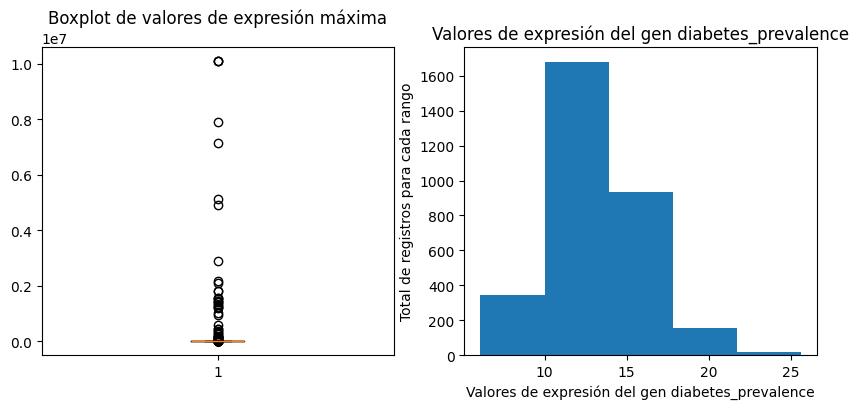

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(datos_limpios_nueva.max())
plt.title('Boxplot de valores de expresión máxima')
plt.subplot(1, 2, 2)
plt.hist(y,5)
plt.xlabel('Valores de expresión del gen diabetes_prevalence')
plt.ylabel('Total de registros para cada rango')
plt.title('Valores de expresión del gen diabetes_prevalence')
plt.show()  

In [11]:
# Crea una instancia del StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a los datos de entrenamiento y transforma los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión lineal base.

In [12]:
# Entrenamos un modelo de regresión lineal sin regularización
m_linear = LinearRegression().fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_linear = m_linear.predict(X_train_scaled)
yhat_linear = m_linear.predict(X_test_scaled)

In [13]:
# Creamos una función que mida el error en ambos conjuntos y la diferencia
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

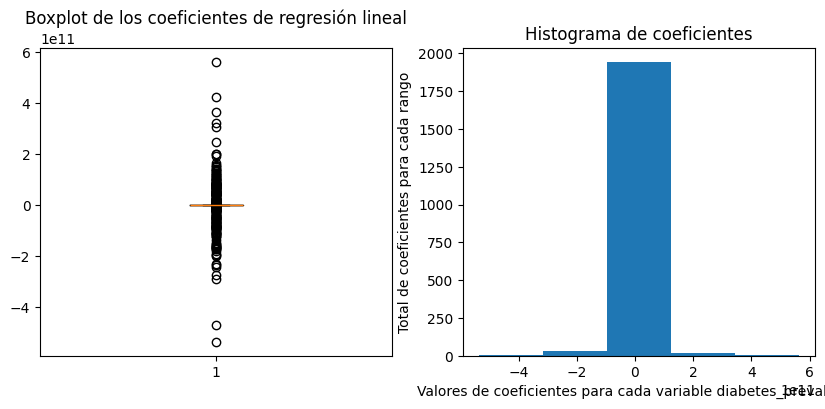

In [14]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_linear.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_linear.coef_,5)
plt.xlabel('Valores de coeficientes para cada variable diabetes_prevalence')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [15]:
# Métricas obtenidas para ambos conjuntos así como su diferencia
get_metrics(yhat_linear, y_test, yhat_train_linear, y_train)

,R2,Median AE,MAPE
Train set,9.999191e-01,0.007915,1.263200e-01
Test set,-5.613108e+21,0.059962,3.273545e+11
Diferencia,-5.613108e+21,0.052046,3.273545e+11


# Regularización Lasso L1


In [69]:
# Entrenamos un modelo LassoCV debemos encontrar un buen valor de alpha (determina la intensidad de la regularización) mediante validación cruzada
m_lasso = LassoCV(alphas=np.logspace(-6, 6, 100), cv=5, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_lasso = m_lasso.predict(X_train_scaled)
yhat_lasso = m_lasso.predict(X_test_scaled)

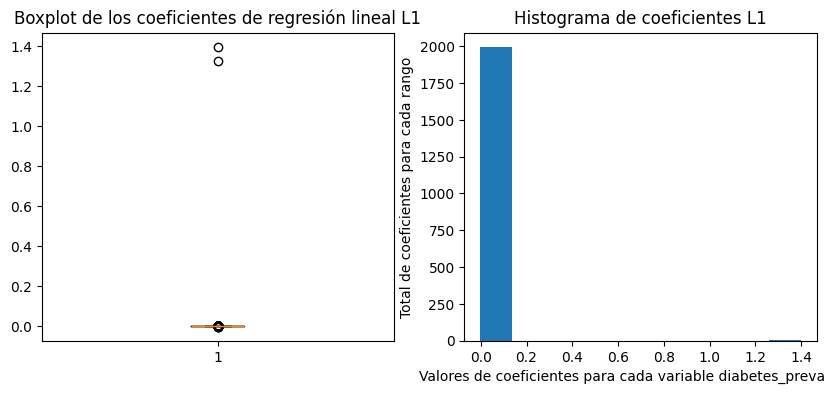

In [70]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal L1')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,10)
plt.xlabel('Valores de coeficientes para cada variable diabetes_prevalence')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes L1')
plt.show()

In [71]:
print(f'Mejor alpha encontrado: {m_lasso.alpha_}')
print(f'Coeficientes: {m_lasso.coef_}')

Mejor alpha encontrado: 0.001873817422860385
Coeficientes: [0. 0. 0. ... 0. 0. 0.]


In [72]:
# Porcentaje de variables canceladas y variables que usa el modelo
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 94.89%
El modelo utiliza 102 variables.


In [73]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.999742,0.045121,0.260045
Test set,0.999738,0.045092,0.257992
Diferencia,-0.000003,-0.000029,-0.002053


El modelo sigue aprendiendo muy bien tanto asi que los está memorizando y tiene muy bajo sesgo


# Regularización Ridge L2

In [74]:
# Entrenamos un modelo LassoCV
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 100), cv=5).fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_ridge = m_ridge.predict(X_train_scaled)
yhat_ridge = m_ridge.predict(X_test_scaled)

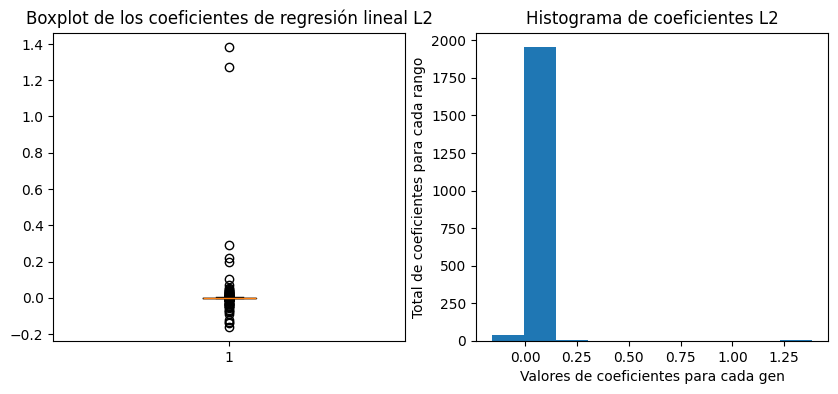

In [75]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal L2')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,10)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes L2')
plt.show()

In [76]:
print(f'Mejor alpha encontrado: {m_ridge.alpha_}')
print(f'Coeficientes: {m_ridge.coef_}')

Mejor alpha encontrado: 0.16297508346206435
Coeficientes: [-0.00194611 -0.00105266 -0.03394093 ...  0.00344364 -0.00320257
 -0.00260064]


In [77]:
get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train)

,R2,Median AE,MAPE
Train set,0.999918,0.000739,0.110264
Test set,0.999479,0.031892,0.345137
Diferencia,-0.000439,0.031153,0.234873
